This notebook is based on code written by: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
rng = np.random.RandomState(1) # set the random state
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # Create a dataset
print("The dimensions of X are", X.shape) 
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is", Xm)
print("The standard deviation is", Xs)
print("The variance is", Xv)
Cx = np.cov(X.T, bias=True)
print("The co-variance matrix is\n", Cx)

The dimensions of X are (200, 2)
The mean is [ 0.03351168 -0.00408072]
The standard deviation is [0.823873   0.31358832]
The variance is [0.67876672 0.09833763]
The co-variance matrix is
 [[0.67876672 0.22978007]
 [0.22978007 0.09833763]]


In [3]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [4]:
Xn = (X-Xm)/Xs
print("Mean after normalisation", np.mean(Xn, axis=0))
print("Standard deviation after normalisation", np.std(Xn, axis=0))
print("Variance after normalisation", np.var(Xn, axis=0))
print("Total Variance after normalisation", np.sum(np.var(Xn, axis=0)))

Mean after normalisation [-3.10862447e-17  0.00000000e+00]
Standard deviation after normalisation [1. 1.]
Variance after normalisation [1. 1.]
Total Variance after normalisation 1.9999999999999996


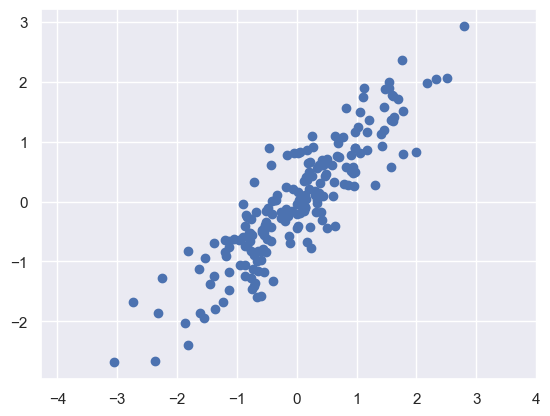

In [5]:
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.axis('equal');

In [6]:
Xn[:, 1]

array([-0.52930205,  1.89733254, -1.27081481, -1.68531797, -1.57782195,
       -0.8458552 , -1.06581723,  1.89879066, -0.30123408, -1.28222104,
        1.08727939, -0.55259871, -1.17903204,  0.85701393,  0.61393769,
       -0.40665182,  1.37004701,  0.13769324,  1.57152337,  0.49812631,
        1.51619656,  0.11867212, -1.16262211,  2.37421615, -0.51321634,
       -0.17902923, -0.66234357, -0.18288752,  0.24671992,  0.20745408,
        0.65005638,  1.74053631, -0.10337254, -1.17585151, -1.12727528,
       -0.62875987, -1.60048492,  0.80870034, -0.46738799, -0.28713345,
        0.01091688, -1.33286074, -0.8173693 ,  0.6632745 ,  0.60942028,
       -0.41348599,  1.75860551, -1.24562189, -0.319482  , -0.20966962,
       -2.68023549,  1.88086993,  0.36611991, -0.99386861,  1.99086889,
        0.57799319,  0.42722614, -0.57187536,  0.11514786, -1.45744857,
        0.77968998, -0.34809421,  0.14242791,  1.17189447,  0.28795326,
        0.2666139 ,  0.28038493, -0.69444838,  0.81848396,  1.50

In [7]:
C = np.cov(Xn.T, bias=True)
print("Covariance matrix Dimensionality is: ", C.shape)
print("Covariance matrix is\n", C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.88938995]
 [0.88938995 1.        ]]


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [9]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [10]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


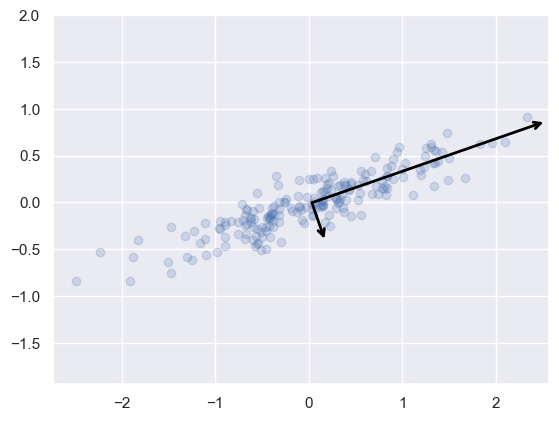

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color="black",
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ - v) # used -v here, instead of +v used in orginal code to get same plot
plt.axis('equal');

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


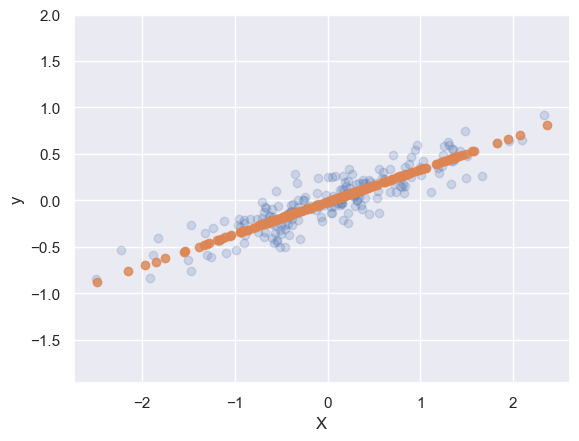

In [19]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("pca_example.pdf")

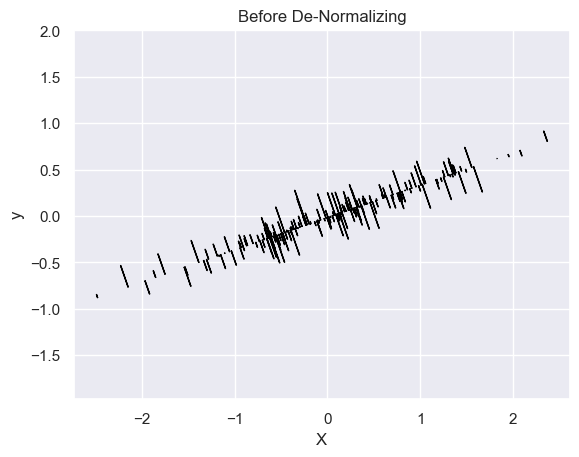

In [28]:
#plt.scatter(X[:, 0], X[:, 1], marker='+')
#plt.scatter(X_new[:, 0], X_new[:, 1])
#plt.legend(['Original', 'Reprojection'])
for x, xr in zip(X, X_new):    
    plt.arrow(x[0], x[1], xr[0]-x[0], xr[1]-x[1], color="black")
plt.title('Before De-Normalizing')
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("y")
plt.show()